<a href="https://colab.research.google.com/github/yashasangani/Projects/blob/main/Sales_analysis_on_retail_Transaction_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from warnings import filterwarnings
filterwarnings("ignore")

In [5]:
# Installing libraries
import pandas as pd


In [6]:
trxn = pd.read_csv("https://raw.githubusercontent.com/yashasangani/Datasets/main/Retail_Data_Transactions.csv")

In [7]:
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [10]:
response = pd.read_csv("https://raw.githubusercontent.com/yashasangani/Datasets/main/Retail_Data_Response.csv")
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [11]:
df = trxn.merge(response,on = 'customer_id',how = 'left')
df


,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [12]:
# features
df.dtypes

,0
customer_id,object
trans_date,object
tran_amount,int64
response,float64


In [13]:
df.shape

(125000, 4)

In [14]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  125000 non-null  object 
 1   trans_date   125000 non-null  object 
 2   tran_amount  125000 non-null  int64  
 3   response     124969 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.8+ MB


In [16]:
# missing values
df.isnull().sum()

,0
customer_id,0
trans_date,0
tran_amount,0
response,31


In [17]:
df = df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [18]:
# change datatypes
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['response']=df['response'].astype('int64')

In [19]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [20]:
df.dtypes

,0
customer_id,object
trans_date,datetime64[ns]
tran_amount,int64
response,int64


In [21]:
# check for outliers

#z-score

from scipy import stats
import numpy as np

# calculate z score

z_score = np.abs(stats.zscore(df['tran_amount']))
z_score_response = np.abs(stats.zscore(df['response']))

# set a threshold
threshold = 3

outliers = z_score>threshold
outliers_response = z_score_response > threshold

print(df[outliers])
print(df[outliers_response])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []
Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


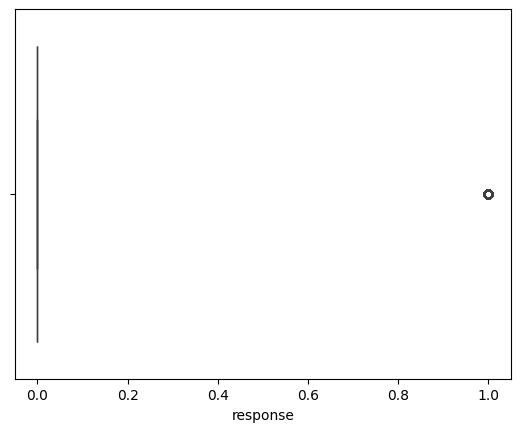

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x = df['response'])
plt.show()

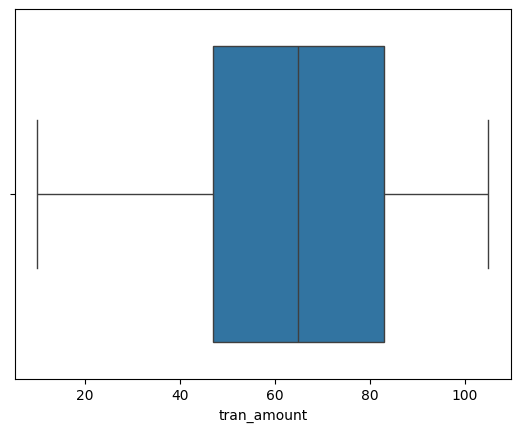

In [23]:
sns.boxplot(x=df['tran_amount'])
plt.show()

In [24]:
# creating new columns

df["month"]= df['trans_date'].dt.month
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [25]:
# which 3 months have had the heights transaction amounts?

monthly_Sales = df.groupby('month')['tran_amount'].sum()
monthly_Sales = monthly_Sales.sort_values(ascending = False).reset_index().head(3)
monthly_Sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [26]:
# customers having heighest number of orders

customer_counts = df['customer_id'].value_counts().reset_index()
customer_counts.columns = ['customer_id','count']

# sort
top_5_cus = customer_counts.sort_values(by='count',ascending=False).head(5)
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='count'>

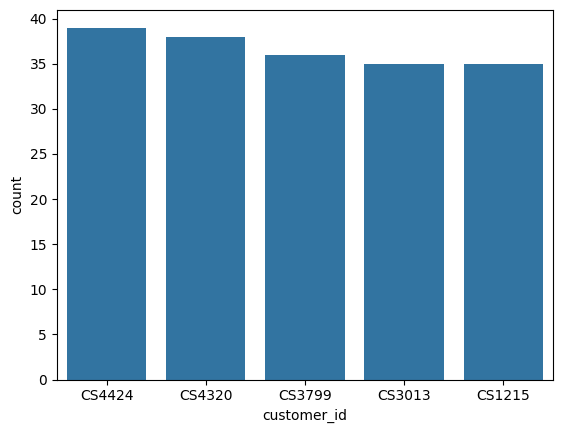

In [27]:
sns.barplot(x = 'customer_id',y = 'count',data = top_5_cus)

In [28]:
# customers having heighest values of orders

customer_Sales = df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_Sales = customer_Sales.sort_values(by = 'tran_amount',ascending = False).head(5)
customer_Sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

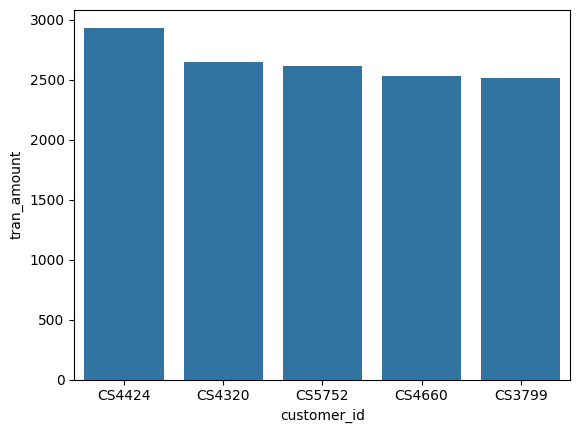

In [29]:
sns.barplot(x = 'customer_id',y='tran_amount',data=customer_Sales)


# Advanced Analytics

# Time Series Analysis

In [30]:
import matplotlib.dates as mdates
df['month_year'] = df['trans_date'].dt.to_period("M")
monthly_sales = df.groupby('month_year')['tran_amount'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

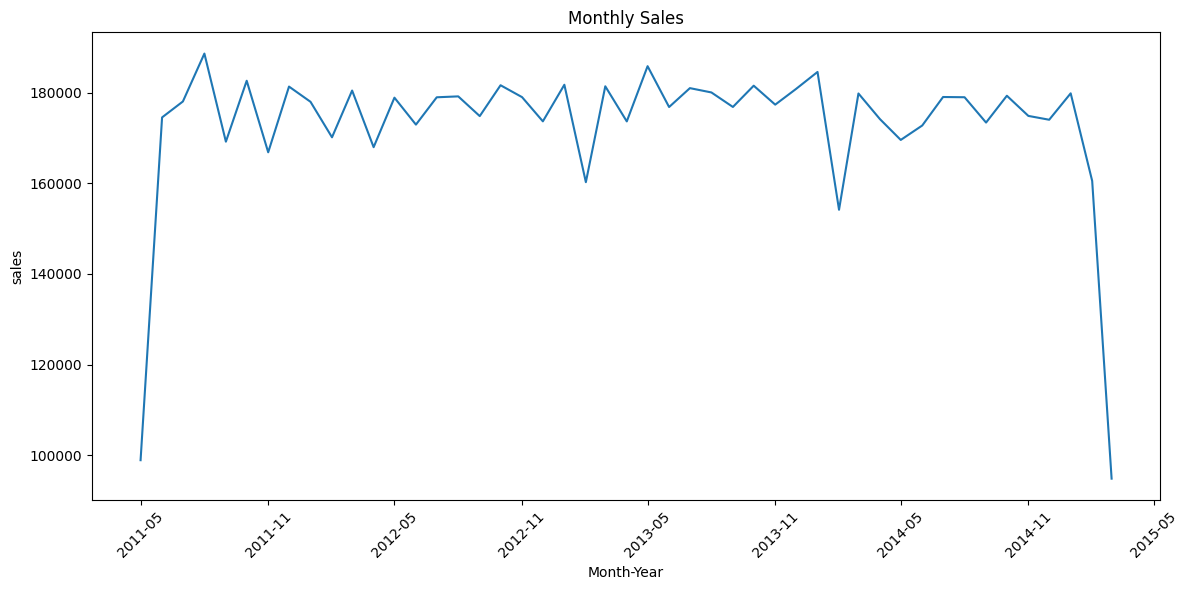

In [31]:
plt.figure(figsize = (12,6))
plt.plot(monthly_sales.index,monthly_sales.values)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval = 6))
plt.xlabel("Month-Year")
plt.ylabel('sales')
plt.title('Monthly Sales')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()




# Cohort segmentation

In [32]:
# Receny

recency = df.groupby('customer_id')['trans_date'].max()

# Frequency

frequency = df.groupby('customer_id')['trans_date'].count()

# Monitary

monetary = df.groupby('customer_id')['tran_amount'].sum()

# Combine

rfm = pd.DataFrame({'recency':recency,'frequency':frequency,'monetary':monetary})
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [33]:
# customer segmentation

def segment_customer(row):
    if row['recency'].year >=2012 and row['frequency'] >=15 and row['monetary']>1000:
        return 'P0'
    elif (2011 <= row['recency'].year<2012) and (10 < row['frequency'] <15) and (500 <= row['monetary']<=1000):
        return 'P1'
    else:
        return 'P2'

rfm['Segment'] = rfm.apply(segment_customer,axis =1)

In [34]:
rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


# Churn Analysis

<Axes: xlabel='response'>

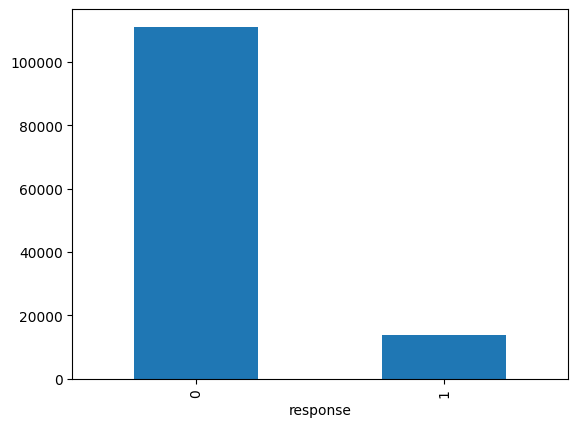

In [35]:
# count the numbers of churned and active customers
churn_counts = df['response'].value_counts()

# plot
churn_counts.plot(kind='bar')

# Analyzing top customers

<Axes: xlabel='month_year'>

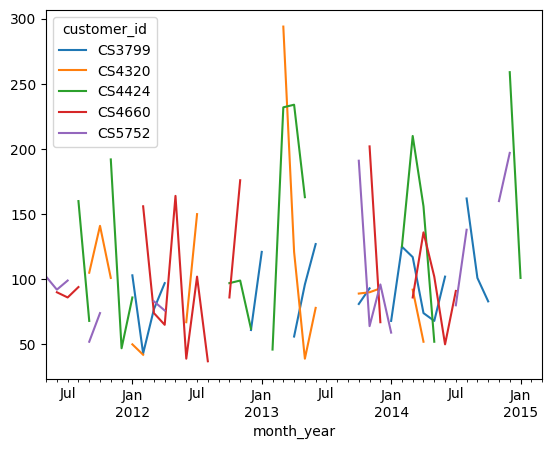

In [36]:
top_5_cus = monetary.sort_values(ascending = False).head(5).index

top_customers_df = df[df['customer_id'].isin(top_5_cus)]

top_customer_sales = top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')

In [37]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


In [38]:
df.to_csv('Maindata.csv')

In [39]:
rfm.to_csv('AddAnalysis.csv')